# Explore the U.S. Education Dataset 
The U.S. Education Dataset was taken from Kaggle ([project page](https://www.kaggle.com/noriuk/us-education-datasets-unification-project)) and it contains detailed state-level information on several facets of education (e.g., education outcomes, revenues, expenditures, etc.) in the United States on an annual basis. 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use("fivethirtyeight")
import seaborn as sns
from sqlalchemy import create_engine
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

%matplotlib inline

## Load the data

In [2]:
# PostgreSQL credentials
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "useducation"

# Read the data from the useducation table
engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

education = pd.read_sql_query("select * from useducation", con=engine)

In [3]:
# Inspect first 5 rows
education.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


## Questions

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [4]:
education.describe(include="all")

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492,1492,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,...,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000
unique,1487,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,...,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,NaN,NaN,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,...,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725
min,NaN,NaN,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,...,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,NaN,NaN,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,...,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171
50%,NaN,NaN,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,...,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912
75%,NaN,NaN,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,...,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121


In [5]:
education["STATE"].unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW_HAMPSHIRE',
       'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK', 'NORTH_CAROLINA',
       'NORTH_DAKOTA', 'OHIO', 'WYOMING', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA',
       'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'BUREAU_OF_INDIAN_AFFAIRS',
       'DOD_OVERSEAS', 'DOD_DOMESTIC', 'AMERICAN_SAMOA', 'GUAM',
       'NORTHERN_MARIANAS', 'PUERTO_RICO', 'VIRGIN_ISLANDS', 'BI', 'DD',
       'NORTHERN_MARIANA_ISLANDS', 'DEPARTMENT_OF_DEFENSE',
       'BUREAU_OF_INDIAN_EDUCATION',
       'DEPART

From the descriptive stats, a few things seem weird. First of all, the primary key shouldn't have duplicate values, which means that `count` should be equal to `unique`. However, since here `unique` is less than `count`, some records must have appeared more than once (e.g., DC appeared 3 times). It's also strange to see 80 unique values in `STATE` since there are only 50 states, 1 federal district, and 5 inhabited territories in the United States. It's likely that this column contains synonyms, typos, or non-states. Lastly, math and reading scores (last 4 columns) have too many (about 2/3!) missing values. I'd be curious to see why this is the case.

2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

Let's focus on California for this question.

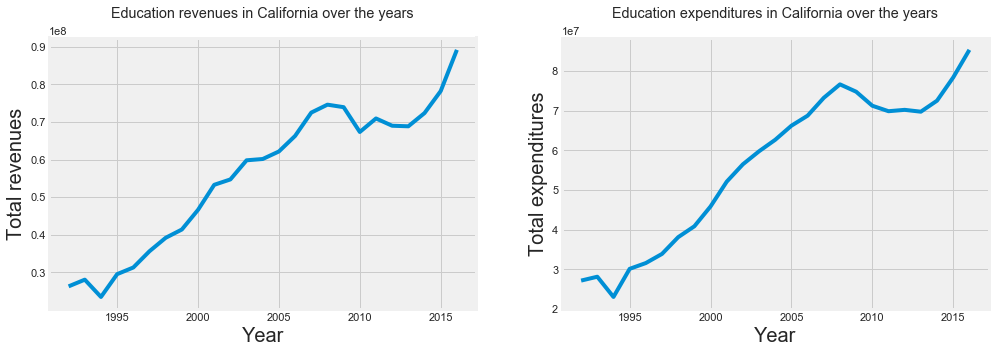

In [43]:
# Select California
cal = education[education["STATE"] == "CALIFORNIA"]

# Plot revenues and expenditures
plt.figure(figsize=(15, 5))

# Total revenues
plt.subplot(1, 2, 1)
sns.lineplot(x="YEAR", y="TOTAL_REVENUE", data=cal)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Total revenues", fontsize=20)
plt.title("Education revenues in California over the years", y=1.05)

# Total expenditures
plt.subplot(1, 2, 2)
sns.lineplot(x="YEAR", y="TOTAL_EXPENDITURE", data=cal)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Total expenditures", fontsize=20)
plt.title("Education expenditures in California over the years", y=1.05)

plt.show()

Overall, California's education revenues and expenditures are growing with time. However, there seem to be a small dip around 1994 and a huge slowdown between 2008 and 2013. After some Googling, I found California's [State Spending Plan for 1993-94](https://lao.ca.gov/1993/spending_plan_73_0993.pdf) that said during 1993-94, the state was still recovering from a recent recession and faced a budget problem that impacted its education revenues and expenditures. This may be why we saw a dip there. Similarly, California was faced with a [budget crisis](https://en.wikipedia.org/wiki/2008%E2%80%932012_California_budget_crisis) between 2008 and 2012, which might have led to the decrease in education revenues and expenditures over this long period. 

3. In your chosen state, which of the lessons are the students more successful, math or reading?

In [64]:
# Select math and reading scores
score_index = cal.columns[-4:].tolist()

cal_scores = cal[score_index]

# Generate descriptive stats
cal_scores.describe()

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,11.000000,11.000000,11.000000,10.000000
mean,225.659625,269.355244,207.911547,261.902652
std,10.063398,5.638743,5.363399,4.861743
min,208.398961,260.892247,196.764414,254.895247
25%,220.510053,264.910990,205.774512,259.188273
50%,230.366957,270.381784,208.522186,261.902941
75%,231.968934,274.047188,211.952302,264.416677
max,234.164993,276.638200,215.421814,269.197451


From the table above, California students appear to be more successful at math than reading; the difference between the two scores is more pronounced in Grade 4 than in Grade 8

4. What are the distributions of the math and reading scores in the sample?

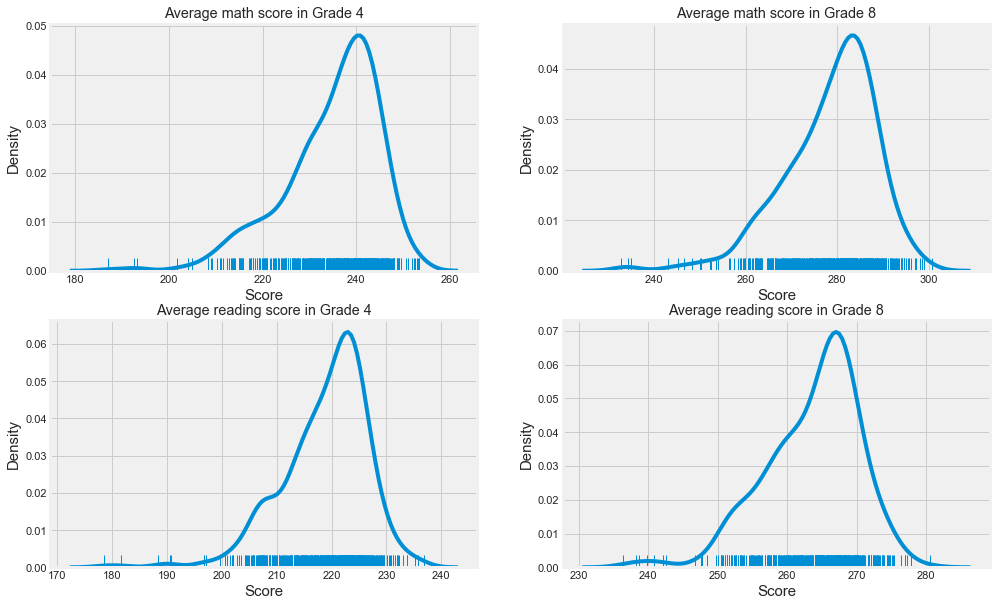

In [68]:
plt.figure(figsize=(15, 10))

# Grade 4 math
plt.subplot(2, 2, 1)
sns.distplot(education["AVG_MATH_4_SCORE"].dropna(), hist=False, rug=True)
plt.title("Average math score in Grade 4")
plt.xlabel("Score", fontsize=15)
plt.ylabel("Density", fontsize=15)

# Grade 8 math
plt.subplot(2, 2, 2)
sns.distplot(education["AVG_MATH_8_SCORE"].dropna(), hist=False, rug=True)
plt.title("Average math score in Grade 8")
plt.xlabel("Score", fontsize=15)
plt.ylabel("Density", fontsize=15)

# Grade 4 reading
plt.subplot(2, 2, 3)
sns.distplot(education["AVG_READING_4_SCORE"].dropna(), hist=False, rug=True)
plt.title("Average reading score in Grade 4")
plt.xlabel("Score", fontsize=15)
plt.ylabel("Density", fontsize=15)

# Grade 8 reading
plt.subplot(2, 2, 4)
sns.distplot(education["AVG_READING_8_SCORE"].dropna(), hist=False, rug=True)
plt.title("Average reading score in Grade 8")
plt.xlabel("Score", fontsize=15)
plt.ylabel("Density", fontsize=15)

plt.tight_layout
plt.show()

Average math and reading scores across all states and years are roughly normally distributed. However, the distributions are a bit left skewed by extremely low scores (e.g., below 200).

5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

1) Replace with means

In [75]:
# Create an empty dataframe with the same dimension
education2 = pd.DataFrame().reindex_like(education)

# Replace missing values in math & reading scores with the mean
for column in education2.columns[-4:]:
    education2[column] = education[column].fillna(education[column].mean())

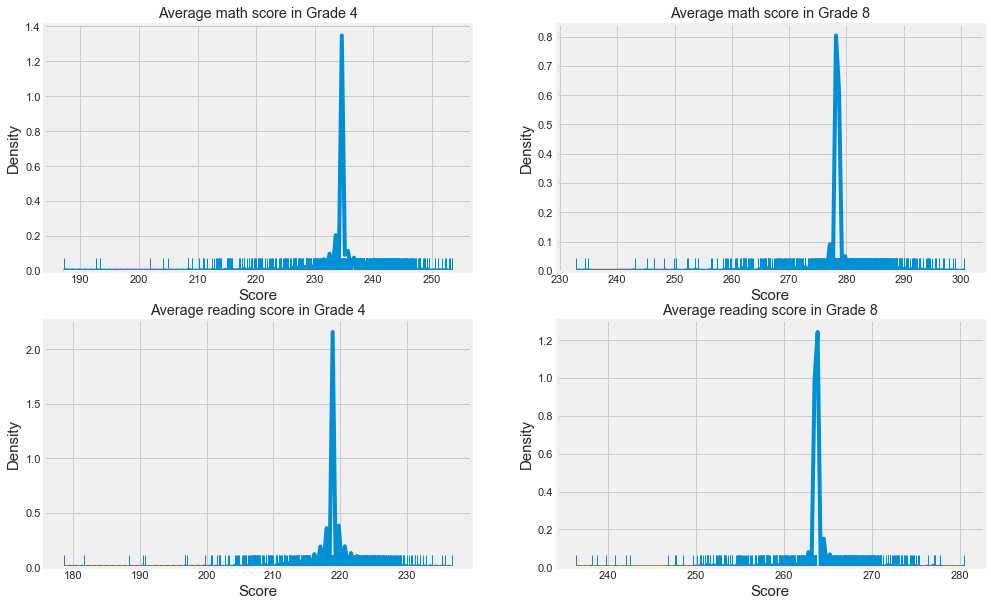

In [76]:
# New distributions
plt.figure(figsize=(15, 10))

# Grade 4 math
plt.subplot(2, 2, 1)
sns.distplot(education2["AVG_MATH_4_SCORE"].dropna(), hist=False, rug=True)
plt.title("Average math score in Grade 4")
plt.xlabel("Score", fontsize=15)
plt.ylabel("Density", fontsize=15)

# Grade 8 math
plt.subplot(2, 2, 2)
sns.distplot(education2["AVG_MATH_8_SCORE"].dropna(), hist=False, rug=True)
plt.title("Average math score in Grade 8")
plt.xlabel("Score", fontsize=15)
plt.ylabel("Density", fontsize=15)

# Grade 4 reading
plt.subplot(2, 2, 3)
sns.distplot(education2["AVG_READING_4_SCORE"].dropna(), hist=False, rug=True)
plt.title("Average reading score in Grade 4")
plt.xlabel("Score", fontsize=15)
plt.ylabel("Density", fontsize=15)

# Grade 8 reading
plt.subplot(2, 2, 4)
sns.distplot(education2["AVG_READING_8_SCORE"].dropna(), hist=False, rug=True)
plt.title("Average reading score in Grade 8")
plt.xlabel("Score", fontsize=15)
plt.ylabel("Density", fontsize=15)

plt.tight_layout
plt.show()

2) Replace with medians

In [77]:
# Create an empty dataframe with the same dimension
education3 = pd.DataFrame().reindex_like(education)

# Replace missing values in math & reading scores with the median
for column in education3.columns[-4:]:
    education3[column] = education[column].fillna(education[column].median())

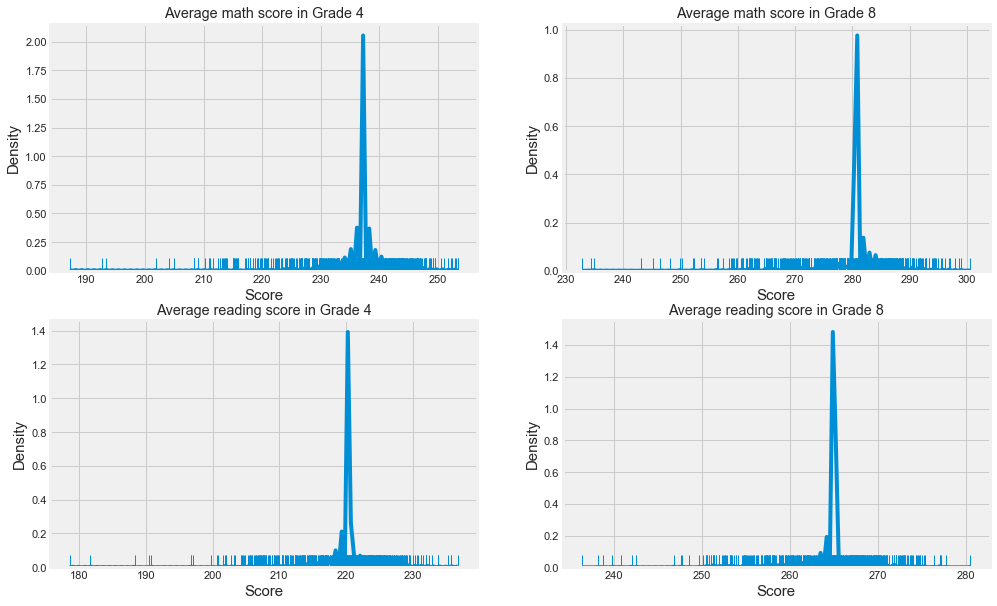

In [78]:
# New distributions
plt.figure(figsize=(15, 10))

# Grade 4 math
plt.subplot(2, 2, 1)
sns.distplot(education3["AVG_MATH_4_SCORE"].dropna(), hist=False, rug=True)
plt.title("Average math score in Grade 4")
plt.xlabel("Score", fontsize=15)
plt.ylabel("Density", fontsize=15)

# Grade 8 math
plt.subplot(2, 2, 2)
sns.distplot(education3["AVG_MATH_8_SCORE"].dropna(), hist=False, rug=True)
plt.title("Average math score in Grade 8")
plt.xlabel("Score", fontsize=15)
plt.ylabel("Density", fontsize=15)

# Grade 4 reading
plt.subplot(2, 2, 3)
sns.distplot(education3["AVG_READING_4_SCORE"].dropna(), hist=False, rug=True)
plt.title("Average reading score in Grade 4")
plt.xlabel("Score", fontsize=15)
plt.ylabel("Density", fontsize=15)

# Grade 8 reading
plt.subplot(2, 2, 4)
sns.distplot(education3["AVG_READING_8_SCORE"].dropna(), hist=False, rug=True)
plt.title("Average reading score in Grade 8")
plt.xlabel("Score", fontsize=15)
plt.ylabel("Density", fontsize=15)

plt.tight_layout
plt.show()

3) Linear interpolation

In [79]:
# Replace missing values using linear interpolation
education4 = education.interpolate(method="linear", limit_direction="forward", limit=1)

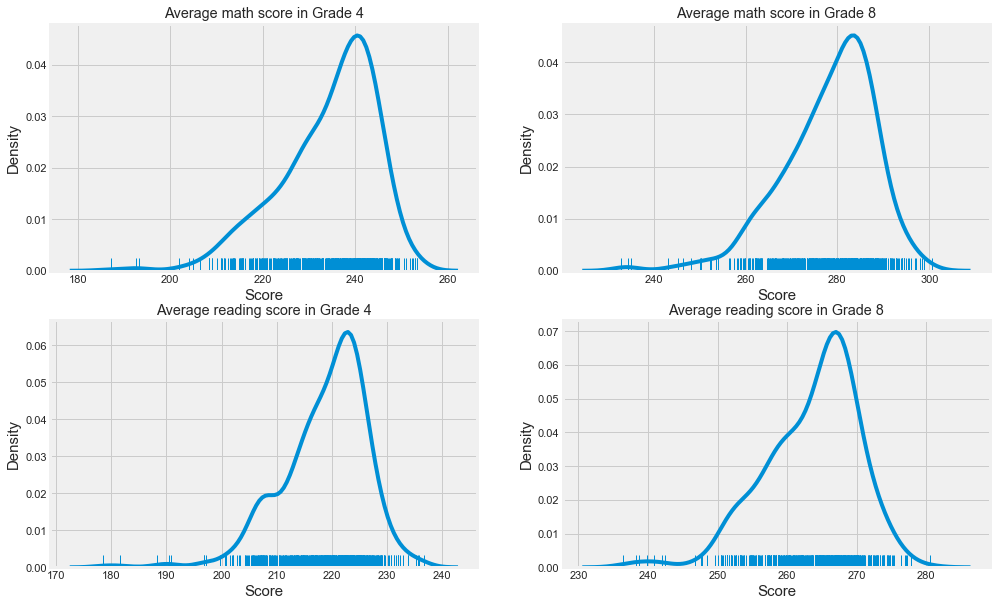

In [80]:
# New distributions
plt.figure(figsize=(15, 10))

# Grade 4 math
plt.subplot(2, 2, 1)
sns.distplot(education4["AVG_MATH_4_SCORE"].dropna(), hist=False, rug=True)
plt.title("Average math score in Grade 4")
plt.xlabel("Score", fontsize=15)
plt.ylabel("Density", fontsize=15)

# Grade 8 math
plt.subplot(2, 2, 2)
sns.distplot(education4["AVG_MATH_8_SCORE"].dropna(), hist=False, rug=True)
plt.title("Average math score in Grade 8")
plt.xlabel("Score", fontsize=15)
plt.ylabel("Density", fontsize=15)

# Grade 4 reading
plt.subplot(2, 2, 3)
sns.distplot(education4["AVG_READING_4_SCORE"].dropna(), hist=False, rug=True)
plt.title("Average reading score in Grade 4")
plt.xlabel("Score", fontsize=15)
plt.ylabel("Density", fontsize=15)

# Grade 8 reading
plt.subplot(2, 2, 4)
sns.distplot(education4["AVG_READING_8_SCORE"].dropna(), hist=False, rug=True)
plt.title("Average reading score in Grade 8")
plt.xlabel("Score", fontsize=15)
plt.ylabel("Density", fontsize=15)

plt.tight_layout
plt.show()

Replacing missing values with means and medians result in distributions with similar central tendencies (be them means or medians) but much small variances. Replacing missing values using linear interpolation, however, doesn't change the shape of the origianl distrubutions.